## Creating augmented data

In [ ]:
import numpy as np
from numpy import asarray
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import shutil
from IPython import display

In [ ]:
IMG_SIZE = (128,128)

In [ ]:
# code to load data
!cp ./drive/MyDrive/data/data.zip -d ./
!unzip data.zip
!cp ./drive/MyDrive/data/model.h5 -d ./

Archive:  data.zip
   creating: data/normal/
  inflating: data/normal/1.jpg       
  inflating: data/normal/10.jpg      
  inflating: data/normal/100.jpg     
  inflating: data/normal/101.jpg     
  inflating: data/normal/102.jpg     
  inflating: data/normal/103.jpg     
  inflating: data/normal/104.jpg     
  inflating: data/normal/105.jpg     
  inflating: data/normal/106.jpg     
  inflating: data/normal/107.jpg     
  inflating: data/normal/108.jpg     
  inflating: data/normal/109.jpg     
  inflating: data/normal/11.jpg      
  inflating: data/normal/110.jpg     
  inflating: data/normal/111.jpg     
  inflating: data/normal/112.jpg     
  inflating: data/normal/113.jpg     
  inflating: data/normal/114.jpg     
  inflating: data/normal/115.jpg     
  inflating: data/normal/116.jpg     
  inflating: data/normal/117.jpg     
  inflating: data/normal/118.jpg     
  inflating: data/normal/119.jpg     
  inflating: data/normal/12.jpg      
  inflating: data/normal/120.jpg     
  inf

In [ ]:
def add_gaussian_noise(image):
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=(20)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)

    return noise_img

In [ ]:
class_path = os.path.join(os.getcwd(),"data","potholes")

In [ ]:
# Loading image 
base_img = tf.keras.utils.load_img(os.path.join(class_path,"1.jpg"))
base_img = asarray(base_img)
img = np.copy(base_img)

[0 0 1 1 0 0]
Inside adding Contrast f:(0.0)... 
Flipping image horizontally ... 


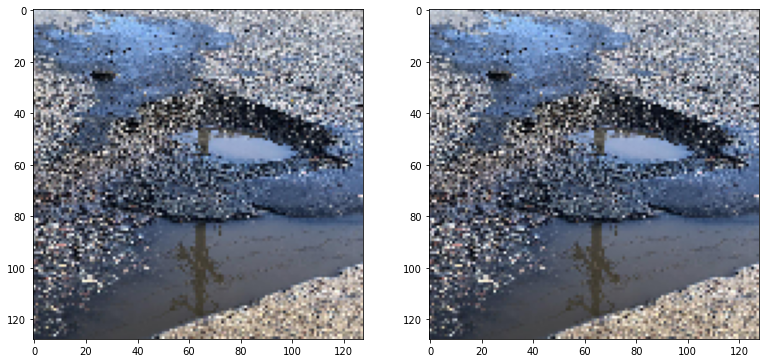

In [ ]:
def augment_img(img):
  img = tf.keras.preprocessing.image.smart_resize(
        img, IMG_SIZE, interpolation='bilinear')
  # img = tf.image.rgb_to_grayscale(img)
  img = img/255.
  # 5 randoms
  choices = np.random.choice([0,1],size = (6,),p = [0.6,0.4])
  print(choices)
  #Noise
  if choices[0]:
    print("Inside adding noise ... ")
    img = add_gaussian_noise(img)

  #brightness
  if choices[1]:
    random_factor = np.random.normal(loc=0,scale = 0.45)
    random_factor = np.clip(random_factor,-0.75,0.75)
    print("Inside adding brightness f:({})... ".format(random_factor))

    random_brightness_layer = tf.keras.layers.RandomBrightness(
                  random_factor,value_range=(0, 1))
    img = random_brightness_layer(img)

  #contrast
  if choices[2]:
    random_factor = np.random.normal(loc=0.35,scale = 0.3)
    random_factor = np.clip(random_factor,0,0.75)
    print("Inside adding Contrast f:({})... ".format(random_factor))

    random_contrast_layer = tf.keras.layers.RandomContrast(random_factor)
    img = random_contrast_layer(img)

  # Flip
  if choices[3]:
    print("Flipping image horizontally ... ")
    random_flip_layer = tf.keras.layers.RandomFlip(mode="horizontal")
    img = random_flip_layer(img)

  #Random Zoom
  if choices[4]:
    random_factor = np.random.normal(loc=0,scale = 0.45)
    random_factor = np.clip(random_factor,-0.75,0.75)
    print("Inside Zooming f({})... ".format(random_factor))


    random_zoom_layer = tf.keras.layers.RandomZoom(random_factor,width_factor = None)
    img = random_zoom_layer(img)


  #finally returing image
  return img

aug_img = augment_img(base_img)

######################################
## displaying image ########
if img.shape[0] != 128:
  img = tf.keras.preprocessing.image.smart_resize(img,IMG_SIZE)
  img  = img/255.
  
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,20))
ax1.imshow(img)
ax2.imshow(aug_img)
fig.show()

In [ ]:
BASE_PATH = os.getcwd()
dir_path = os.path.join(BASE_PATH,"data")
print(os.listdir(dir_path))

dest_path = os.path.join(BASE_PATH,"aug_data")

['normal', 'potholes']


In [ ]:
# shutil.rmtree("./aug_data")
# !mkdir aug_data
# !mkdir aug_data/normal
# !mkdir aug_data/potholes

### Create Data

In [ ]:
FREQ_PER_IMAGE = 5

In [ ]:
for d in os.listdir(dir_path):
  imgs_path = os.path.join(dir_path,d)
  for im in os.listdir(imgs_path):
    img_path = os.path.join(imgs_path,im)
    img_name = im.split(".")[0]
    #loading main image
    main_img = tf.keras.utils.load_img(img_path)
    main_img = asarray(main_img)

    try:
      # transforming original image
      # img = tf.image.rgb_to_grayscale(main_img)
      img = tf.keras.preprocessing.image.smart_resize(
            img, IMG_SIZE, interpolation='bilinear')
      img = img/255.
      tf.keras.utils.save_img(
            os.path.join(dest_path,d,img_name +'.jpg'),
            img,
        )
      
   
      #creating and saving 5 augmented images
      for i in range(FREQ_PER_IMAGE):
        aug_img = augment_img(main_img)
        
        tf.keras.utils.save_img(
            os.path.join(dest_path,d,img_name + "_" + str(i)+'.jpg'),
            aug_img,
        )

    except Exception as e:
      print("Error occured !")
      print(main_img.shape)

    display.clear_output(wait = True)

[1 1 1 1 1 0]
Inside adding noise ... 
Inside adding brightness f:(-0.28290692382766874)... 
Inside adding Contrast f:(0.33458840372447685)... 
Flipping image horizontally ... 
Inside Zooming f(0.020530609884256847)... 
[1 0 1 0 0 0]
Inside adding noise ... 
Inside adding Contrast f:(0.41209625089604485)... 
[0 1 1 1 0 1]
Inside adding brightness f:(-0.12421663159731539)... 
Inside adding Contrast f:(0.4286178925084454)... 
Flipping image horizontally ... 
[0 0 0 0 0 0]
[1 0 0 0 1 0]
Inside adding noise ... 
Inside Zooming f(-0.1000232084533516)... 


In [ ]:
!cp aug_data -r ./drive/MyDrive/data

## importing Data

In [ ]:
from dataclasses import dataclass
import sklearn
import os
from tensorflow.keras import layers,optimizers,losses
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
!cp ./drive/MyDrive/data/aug_data -r ./

## Running on WANDB

In [ ]:
%%capture
!pip install wandb
import wandb
from wandb.keras import WandbCallback
wandb.login()

KeyboardInterrupt: ignored

In [ ]:
# code to load data
!cp ./drive/MyDrive/data/data.zip -d ./
!unzip data.zip
# !cp ./drive/MyDrive/data/model.h5 -d ./


Archive:  data.zip
   creating: data/normal/
  inflating: data/normal/1.jpg       
  inflating: data/normal/10.jpg      
  inflating: data/normal/100.jpg     
  inflating: data/normal/101.jpg     
  inflating: data/normal/102.jpg     
  inflating: data/normal/103.jpg     
  inflating: data/normal/104.jpg     
  inflating: data/normal/105.jpg     
  inflating: data/normal/106.jpg     
  inflating: data/normal/107.jpg     
  inflating: data/normal/108.jpg     
  inflating: data/normal/109.jpg     
  inflating: data/normal/11.jpg      
  inflating: data/normal/110.jpg     
  inflating: data/normal/111.jpg     
  inflating: data/normal/112.jpg     
  inflating: data/normal/113.jpg     
  inflating: data/normal/114.jpg     
  inflating: data/normal/115.jpg     
  inflating: data/normal/116.jpg     
  inflating: data/normal/117.jpg     
  inflating: data/normal/118.jpg     
  inflating: data/normal/119.jpg     
  inflating: data/normal/12.jpg      
  inflating: data/normal/120.jpg     
  inf

In [ ]:
@dataclass
class Config:
  data_dir:str = os.path.join(os.getcwd(),"data")

In [ ]:
files = glob.glob(Config.data_dir + "/*/*")
print(*files[:5],sep = "\n")

In [ ]:
def load_single_img(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img,channels=3)
  return img

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        './data/train/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

testing_set= test_datagen.flow_from_directory(
    "./data/test/",
    target_size = (64,64),
    batch_size=32,
    class_mode= 'binary'
)

In [ ]:
training_set.class_indices

In [ ]:
# Creating Model
def Model():
  return tf.keras.models.Sequential([
      layers.Input((64,64,3)),
      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Flatten(),
      layers.Dense(50,activation = 'relu'),
      layers.Dense(1,activation = 'sigmoid')
  ])

In [ ]:
# model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
# history = model.fit(training_set,validation_data=testing_set,epochs = 10)

In [ ]:
# Define sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'val_acc'},
    'parameters': 
    {
        'batch_size': {'values': [16, 32, 64]},
        'learning_rate':{
          'values': [0.01, 0.005, 0.001, 0.0005, 0.0001]
      },
     }
}

In [ ]:
def sweep_train(config_defaults=None):
  # Set default values
  config_defaults = {
      "batch_size": 64,
      "learning_rate": 0.01
  }

  wandb.init(config=config_defaults)

  wandb.config.epochs = 20
  wandb.config.architecture_name = "CNN"
  wandb.config.dataset_name = "POTHOLES"

  # build input pipeline using tf.data
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)
  training_set = train_datagen.flow_from_directory(
      './data/train/',
      target_size=(64, 64),
      batch_size=wandb.config.batch_size,
      class_mode='binary')

  test_datagen = ImageDataGenerator(
  rescale = 1./255,
  shear_range=0.2,
  zoom_range = 0.2,
  horizontal_flip = True)

  testing_set= test_datagen.flow_from_directory(
      "./data/test/",
      target_size = (64,64),
      batch_size=wandb.config.batch_size,
      class_mode= 'binary'
  )

  model = Model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate)
  loss_fn = tf.keras.losses.BinaryCrossentropy()
  model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['accuracy'])

  model.fit(training_set,validation_data = testing_set,epochs = wandb.config.epochs,
            callbacks = [WandbCallback()])

In [ ]:
sweep_id = wandb.sweep(sweep=sweep_configuration, project='pothole-detection-6')

In [ ]:
# Sweep Id -> 2hl7q3wi

In [ ]:
wandb.agent(sweep_id, function=sweep_train, count=10)

## Loading best Model

In [ ]:
# best model hyperparameters
lr = 0.0001
bs = 64

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="auto",
    restore_best_weights=True,
    patience=5
)

In [ ]:
# build input pipeline using tf.data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    )

training_set = train_datagen.flow_from_directory(
    './data/',
    target_size=(128, 128),
    batch_size=bs,
    class_mode='binary',
    subset = 'training'
    )

testing_set= train_datagen.flow_from_directory(
    "./data/",
    target_size = (128,128),
    batch_size=bs,
    class_mode= 'binary',
    subset = 'validation'
)


Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
def Model():
  return tf.keras.models.Sequential([
      layers.Input((128,128,3)),
      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Conv2D(32,2,padding='valid',activation = 'relu'),
      layers.Conv2D(32,2,padding = 'valid',activation = 'relu'),
      layers.MaxPool2D(pool_size= (2,2),strides = None,padding= 'valid'),

      layers.Flatten(),
      layers.Dense(50,activation = 'relu'),
      layers.Dense(1,activation = 'sigmoid')
  ])

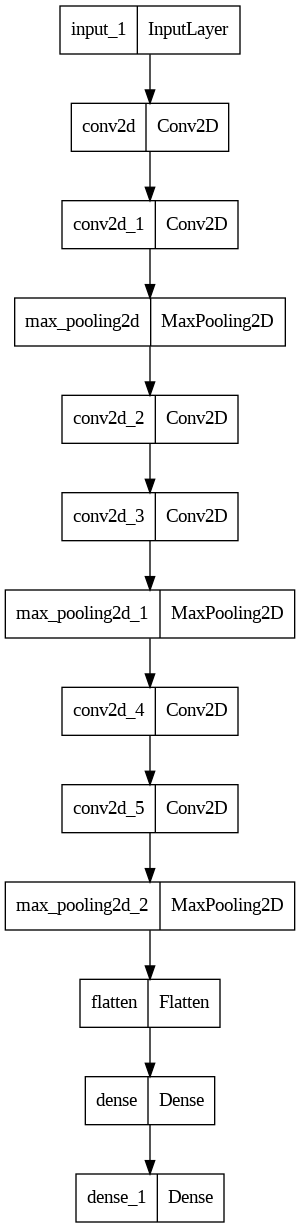

In [ ]:
model = Model()
tf.keras.utils.plot_model(model)

In [ ]:
# model creation
model = Model()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

loss_fn = tf.keras.losses.BinaryCrossentropy()

# model compilation
model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['accuracy'])

#model training
model.fit(training_set,validation_data = testing_set,epochs = 20)


Epoch 1/20
9/9 [==============================] - 28s 2s/step - loss: 0.6918 - accuracy: 0.5348 - val_loss: 0.6890 - val_accuracy: 0.5407
Epoch 2/20
9/9 [==============================] - 14s 2s/step - loss: 0.6862 - accuracy: 0.6557 - val_loss: 0.6812 - val_accuracy: 0.7481
Epoch 3/20
9/9 [==============================] - 15s 2s/step - loss: 0.6737 - accuracy: 0.7125 - val_loss: 0.6661 - val_accuracy: 0.7407
Epoch 4/20
9/9 [==============================] - 15s 2s/step - loss: 0.6532 - accuracy: 0.8132 - val_loss: 0.6388 - val_accuracy: 0.7556
Epoch 5/20
9/9 [==============================] - 14s 2s/step - loss: 0.6130 - accuracy: 0.8114 - val_loss: 0.5968 - val_accuracy: 0.7407
Epoch 6/20
9/9 [==============================] - 17s 2s/step - loss: 0.5614 - accuracy: 0.8260 - val_loss: 0.5475 - val_accuracy: 0.7407
Epoch 7/20
9/9 [==============================] - 14s 2s/step - loss: 0.5021 - accuracy: 0.8315 - val_loss: 0.5030 - val_accuracy: 0.7333
Epoch 8/20
9/9 [==================

In [ ]:
model.save("./best-model.h5")

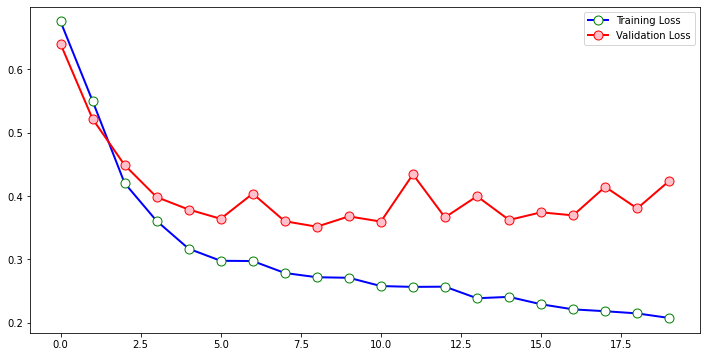

In [ ]:
train_loss,test_loss = model.history.history.get('loss'),model.history.history.get("val_loss")
plt.figure(figsize = (12,6))

plt.plot(train_loss,marker = 'o',c='b',mfc='w', mec='g'
         ,linewidth = 2,markersize=9,label="Training Loss")
plt.plot(test_loss,marker = 'o',c='r',mfc='pink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Loss")
plt.legend()
plt.show()

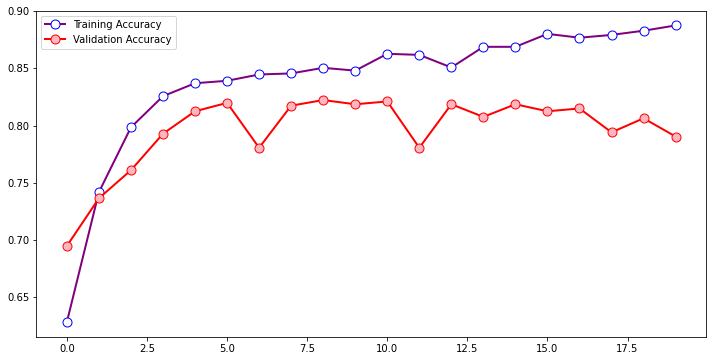

In [ ]:
plt.figure(figsize = (12,6))

train_acc,test_acc = model.history.history.get("accuracy"), model.history.history.get("val_accuracy")

plt.plot(train_acc,marker = 'o',c='purple',mfc='w', mec='b'
         ,linewidth = 2,markersize=9,label="Training Accuracy")
plt.plot(test_acc,marker = 'o',c='r',mfc='lightpink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
loss_df = pd.DataFrame({
    'custom_model': model.history.history.get('loss')
})
acc_df = pd.DataFrame({
    'custom_model':model.history.history.get('accuracy')
})

In [ ]:
# tf.keras.models.save_model(model,"model.h5")

## Transfer Learning Models

### MobileNet V2

In [ ]:
# !cp drive/MyDrive/data/aug_data -r ./

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
def create_model():
  base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)
  # base_model.trainable = False
  # base_model_outputs = base_model.output
  
  m = tf.keras.models.Model(base_model.inputs,base_model.layers[14].output)
  m.trainable = False
  base_model_outputs = m.output

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model_outputs)
  x = tf.keras.layers.Dense(100,activation = 'relu')(x)
  x = tf.keras.layers.Dense(50,activation = 'relu')(x)
  x = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)


  return tf.keras.models.Model(base_model.input,x)


In [ ]:
model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 bn_Conv1 (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 Conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 expanded_conv_depthwise (De  (None, 64, 64, 32)       288       
 pthwiseConv2D)                                                  
                                                                 
 expanded_conv_depthwise_BN   (None, 64, 64, 32)       128 

In [ ]:
img_height, img_width = (128,128)

In [ ]:
train_datagen = ImageDataGenerator(
        preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
        validation_split = 0.2
        )

training_set = train_datagen.flow_from_directory(
        './aug_data',
        target_size=(img_height,img_width),
        batch_size=32,
        class_mode='binary',subset = 'training')


testing_set = train_datagen.flow_from_directory(
        './aug_data',
        target_size=(img_height,img_width),
        batch_size=32,
        class_mode='binary',subset = 'validation')

Found 3270 images belonging to 2 classes.
Found 816 images belonging to 2 classes.


In [ ]:
class MYCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if logs.get('binary_accuracy') == 1.00 and logs.get("val_binary_accuracy")== 1.00:
      print("\nModel have reached the threshold acc !")
      self.model.stop_training = True

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['binary_accuracy'])
history = model.fit(training_set,validation_data = testing_set,epochs = 20,callbacks = [MYCallback()])

Epoch 1/20
103/103 [==============================] - 14s 46ms/step - loss: 0.6138 - binary_accuracy: 0.6920 - val_loss: 0.5255 - val_binary_accuracy: 0.7549
Epoch 2/20
103/103 [==============================] - 4s 43ms/step - loss: 0.4852 - binary_accuracy: 0.7713 - val_loss: 0.4678 - val_binary_accuracy: 0.7647
Epoch 3/20
103/103 [==============================] - 5s 51ms/step - loss: 0.4429 - binary_accuracy: 0.7817 - val_loss: 0.4385 - val_binary_accuracy: 0.7941
Epoch 4/20
103/103 [==============================] - 4s 37ms/step - loss: 0.4159 - binary_accuracy: 0.7951 - val_loss: 0.4368 - val_binary_accuracy: 0.7721
Epoch 5/20
103/103 [==============================] - 5s 48ms/step - loss: 0.3997 - binary_accuracy: 0.7954 - val_loss: 0.4130 - val_binary_accuracy: 0.7868
Epoch 6/20
103/103 [==============================] - 4s 37ms/step - loss: 0.3847 - binary_accuracy: 0.8092 - val_loss: 0.4081 - val_binary_accuracy: 0.7941
Epoch 7/20
103/103 [==============================] - 4s 

#### Visualizing Image Processing by Model

Sample Image Shape : (128, 128, 3)
Trainable :  False


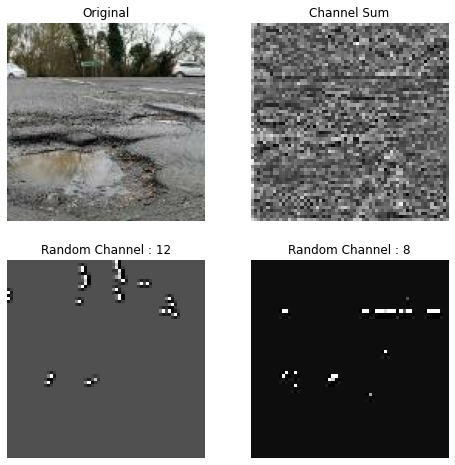

In [ ]:
print("Sample Image Shape :",sample_image.shape)

image_locs = [os.path.join(os.getcwd(),"aug_data","potholes",path) for path in os.listdir("./aug_data/potholes")]

def load_image(img_loc):
  img = tf.io.read_file(img_loc)
  img = tf.image.decode_png(img)
  return img

sample_image = load_image(image_locs[10])

# Making Sub-Model
sub_model = tf.keras.models.Sequential(
    model.layers[:7]
)
sub_model.trainable = False
print("Trainable : ",sub_model.trainable)

# Plotting Result
fig,axis = plt.subplots(2,2,figsize = (8,8))

img_counter = 1
for i,axises in enumerate(axis):
  for j,ax in enumerate(axises):
    if i == 0 and j == 0:
      ax.set_title("Original")
      ax.imshow(sample_image)
    elif i == 0 and j == 1:
      ax.set_title("Channel Sum")
      model_image = tf.math.reduce_sum(model_image,axis = -1)
      ax.imshow(model_image[0,:,:],cmap = plt.cm.gray)
    else:
      model_image = sub_model(sample_image[tf.newaxis,...])
      random_index = np.random.randint(0,model_image.shape[-1])
      ax.set_title("Random Channel : {}".format(random_index))
      ax.imshow(model_image[0,:,:,random_index],cmap = plt.cm.gray)

    ax.set_axis_off()

plt.show()

In [ ]:
model.evaluate(training_set)

103/103 [==============================] - 4s 36ms/step - loss: 0.3529 - binary_accuracy: 0.8110


[0.3529350757598877, 0.8110091686248779]

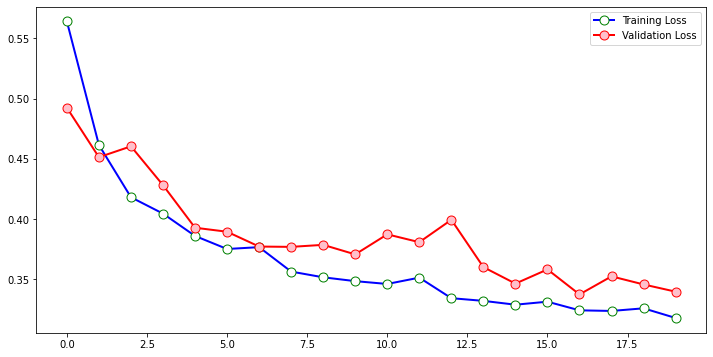

In [ ]:
train_loss,test_loss = history.history.get('loss'),history.history.get("val_loss")
plt.figure(figsize = (12,6))

plt.plot(train_loss,marker = 'o',c='b',mfc='w', mec='g'
         ,linewidth = 2,markersize=9,label="Training Loss")
plt.plot(test_loss,marker = 'o',c='r',mfc='pink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Loss")
plt.legend()
plt.show()

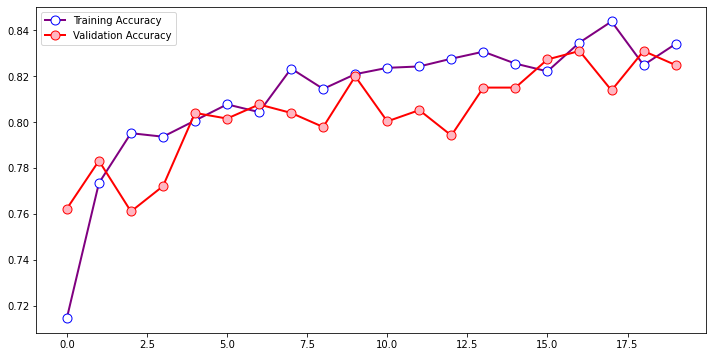

In [ ]:
plt.figure(figsize = (12,6))

train_acc,test_acc = history.history.get("binary_accuracy"),history.history.get("val_binary_accuracy")

plt.plot(train_acc,marker = 'o',c='purple',mfc='w', mec='b'
         ,linewidth = 2,markersize=9,label="Training Accuracy")
plt.plot(test_acc,marker = 'o',c='r',mfc='lightpink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
loss_df['MobileNetV2'] = history.history.get('loss')
acc_df['MobileNetV2'] = history.history.get("binary_accuracy")

In [ ]:
# tf.keras.models.save_model(model = model,filepath = "./drive/MyDrive/data/mobilenet_v3_potholes.h5")

### Resnetv50

In [ ]:
base_model = tf.keras.applications.ResNet50V2(input_shape=[128, 128, 3], include_top=False)
def create_model():
  base_model = tf.keras.applications.ResNet50V2(input_shape=[128, 128, 3], include_top=False)
  # base_model.trainable = False
  # base_model_outputs = base_model.output

  m = tf.keras.models.Model(base_model.inputs,base_model.layers[20].output)
  m.trainable = False
  base_model_outputs = m.output

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model_outputs)
  x = tf.keras.layers.Dense(100,activation = 'relu')(x)
  x = tf.keras.layers.Dense(50,activation = 'relu')(x)
  x = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)


  return tf.keras.models.Model(base_model.input,x)

model = create_model()
model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D) 

In [ ]:
img_height, img_width = (128,128)
train_datagen = ImageDataGenerator(
        preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
        validation_split = 0.2
        )

training_set = train_datagen.flow_from_directory(
        './aug_data',
        target_size=(img_height,img_width),
        batch_size=64,
        class_mode='binary',subset = 'training')


testing_set = train_datagen.flow_from_directory(
        './aug_data',
        target_size=(img_height,img_width),
        batch_size=64,
        class_mode='binary',subset = 'validation')


class MYCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if logs.get('binary_accuracy') == 1.00 and logs.get("val_binary_accuracy")== 1.00:
      print("\nModel have reached the threshold acc !")
      self.model.stop_training = True


optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['binary_accuracy'])
history = model.fit(training_set,validation_data = testing_set,epochs = 20,callbacks = [MYCallback()])

Found 3270 images belonging to 2 classes.
Found 816 images belonging to 2 classes.
Epoch 1/20
52/52 [==============================] - 15s 103ms/step - loss: 0.6497 - binary_accuracy: 0.6502 - val_loss: 0.5471 - val_binary_accuracy: 0.7181
Epoch 2/20
52/52 [==============================] - 4s 74ms/step - loss: 0.4930 - binary_accuracy: 0.7584 - val_loss: 0.5105 - val_binary_accuracy: 0.7267
Epoch 3/20
52/52 [==============================] - 5s 89ms/step - loss: 0.4387 - binary_accuracy: 0.7890 - val_loss: 0.4530 - val_binary_accuracy: 0.7696
Epoch 4/20
52/52 [==============================] - 4s 82ms/step - loss: 0.4029 - binary_accuracy: 0.8021 - val_loss: 0.4502 - val_binary_accuracy: 0.7647
Epoch 5/20
52/52 [==============================] - 4s 74ms/step - loss: 0.3860 - binary_accuracy: 0.8055 - val_loss: 0.4173 - val_binary_accuracy: 0.7782
Epoch 6/20
52/52 [==============================] - 4s 86ms/step - loss: 0.3842 - binary_accuracy: 0.8119 - val_loss: 0.3984 - val_binary_ac

Trainable :  False


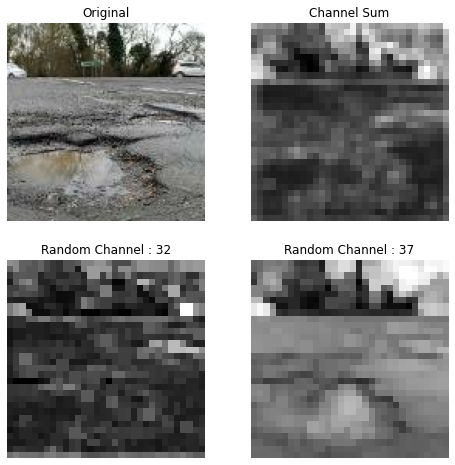

In [ ]:
image_locs = [os.path.join(os.getcwd(),"aug_data","potholes",path) for path in os.listdir("./aug_data/potholes")]

def load_image(img_loc):
  img = tf.io.read_file(img_loc)
  img = tf.image.decode_png(img)
  return img

sample_image = load_image(image_locs[10])

# Making Sub-Model
sub_model = tf.keras.models.Sequential(
    model.layers[:7]
)
sub_model.trainable = False
print("Trainable : ",sub_model.trainable)

model_image = sub_model(sample_image[tf.newaxis,...])

# Plotting Result
fig,axis = plt.subplots(2,2,figsize = (8,8))

img_counter = 1
for i,axises in enumerate(axis):
  for j,ax in enumerate(axises):
    if i == 0 and j == 0:
      ax.set_title("Original")
      ax.imshow(sample_image)
    elif i == 0 and j == 1:
      ax.set_title("Channel Sum")
      model_image = tf.math.reduce_sum(model_image,axis = -1)
      ax.imshow(model_image[0,:,:],cmap = plt.cm.gray)
    else:
      model_image = sub_model(sample_image[tf.newaxis,...])
      random_index = np.random.randint(0,model_image.shape[-1])
      ax.set_title("Random Channel : {}".format(random_index))
      ax.imshow(model_image[0,:,:,random_index],cmap = plt.cm.gray)

    ax.set_axis_off()

plt.show()

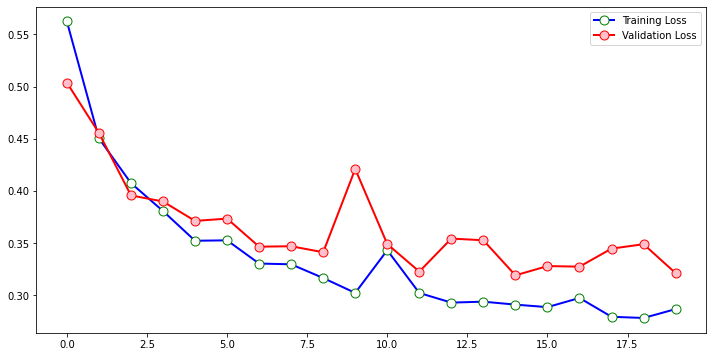

In [ ]:
train_loss,test_loss = history.history.get('loss'),history.history.get("val_loss")
plt.figure(figsize = (12,6))

plt.plot(train_loss,marker = 'o',c='b',mfc='w', mec='g'
         ,linewidth = 2,markersize=9,label="Training Loss")
plt.plot(test_loss,marker = 'o',c='r',mfc='pink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Loss")
plt.legend()
plt.show()

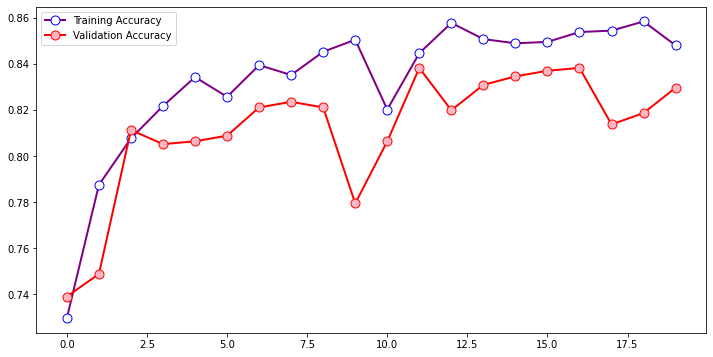

In [ ]:
plt.figure(figsize = (12,6))

train_acc,test_acc = history.history.get("binary_accuracy"),history.history.get("val_binary_accuracy")

plt.plot(train_acc,marker = 'o',c='purple',mfc='w', mec='b'
         ,linewidth = 2,markersize=9,label="Training Accuracy")
plt.plot(test_acc,marker = 'o',c='r',mfc='lightpink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
loss_df['ResNet50V2'] = history.history.get('loss')
acc_df['ResNet50V2'] =  history.history.get('binary_accuracy')

### Inception

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=[128, 128, 3], include_top=False)
def create_model():
  base_model = tf.keras.applications.InceptionV3(input_shape=[128, 128, 3], include_top=False)
  # base_model.trainable = False
  # base_model_outputs = base_model.output
  m = tf.keras.models.Model(base_model.inputs,base_model.layers[14].output)
  m.trainable = False
  base_model_outputs = m.output


  x = tf.keras.layers.GlobalAveragePooling2D()(base_model_outputs)
  x = tf.keras.layers.Dense(100,activation = 'relu')(x)
  x = tf.keras.layers.Dense(50,activation = 'relu')(x)
  x = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)


  return tf.keras.models.Model(base_model.input,x)

model = create_model()
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_94 (Conv2D)          (None, 63, 63, 32)        864       
                                                                 
 batch_normalization_94 (Bat  (None, 63, 63, 32)       96        
 chNormalization)                                                
                                                                 
 activation_94 (Activation)  (None, 63, 63, 32)        0         
                                                                 
 conv2d_95 (Conv2D)          (None, 61, 61, 32)        9216      
                                                                 
 batch_normalization_95 (Bat  (None, 61, 61, 32)       96   

In [ ]:
class MYCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if logs.get('binary_accuracy') == 1.00 and logs.get("val_binary_accuracy")== 1.00:
      print("\nModel have reached the threshold acc !")
      self.model.stop_training = True

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['binary_accuracy'])
history = model.fit(training_set,validation_data = testing_set,epochs = 20,callbacks = [MYCallback()])

Epoch 1/20
52/52 [==============================] - 10s 118ms/step - loss: 0.5379 - binary_accuracy: 0.7303 - val_loss: 0.4941 - val_binary_accuracy: 0.7365
Epoch 2/20
52/52 [==============================] - 5s 88ms/step - loss: 0.4207 - binary_accuracy: 0.7945 - val_loss: 0.4669 - val_binary_accuracy: 0.7475
Epoch 3/20
52/52 [==============================] - 4s 76ms/step - loss: 0.3681 - binary_accuracy: 0.8171 - val_loss: 0.4060 - val_binary_accuracy: 0.7941
Epoch 4/20
52/52 [==============================] - 4s 72ms/step - loss: 0.3501 - binary_accuracy: 0.8272 - val_loss: 0.3810 - val_binary_accuracy: 0.8002
Epoch 5/20
52/52 [==============================] - 4s 82ms/step - loss: 0.3425 - binary_accuracy: 0.8376 - val_loss: 0.3651 - val_binary_accuracy: 0.7990
Epoch 6/20
52/52 [==============================] - 4s 77ms/step - loss: 0.3260 - binary_accuracy: 0.8318 - val_loss: 0.4044 - val_binary_accuracy: 0.7917
Epoch 7/20
52/52 [==============================] - 4s 74ms/step - l

Trainable :  False


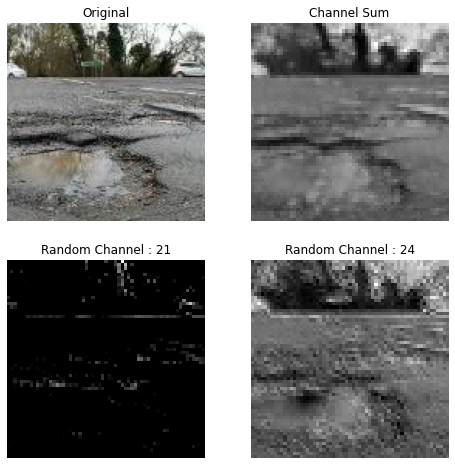

In [ ]:
image_locs = [os.path.join(os.getcwd(),"aug_data","potholes",path) for path in os.listdir("./aug_data/potholes")]

def load_image(img_loc):
  img = tf.io.read_file(img_loc)
  img = tf.image.decode_png(img)
  return img

sample_image = load_image(image_locs[10])

# Making Sub-Model
sub_model = tf.keras.models.Sequential(
    model.layers[:7]
)
sub_model.trainable = False
print("Trainable : ",sub_model.trainable)

model_image = sub_model(sample_image[tf.newaxis,...])

# Plotting Result
fig,axis = plt.subplots(2,2,figsize = (8,8))

img_counter = 1
for i,axises in enumerate(axis):
  for j,ax in enumerate(axises):
    if i == 0 and j == 0:
      ax.set_title("Original")
      ax.imshow(sample_image)
    elif i == 0 and j == 1:
      ax.set_title("Channel Sum")
      model_image = tf.math.reduce_sum(model_image,axis = -1)
      ax.imshow(model_image[0,:,:],cmap = plt.cm.gray)
    else:
      model_image = sub_model(sample_image[tf.newaxis,...])
      random_index = np.random.randint(0,model_image.shape[-1])
      ax.set_title("Random Channel : {}".format(random_index))
      ax.imshow(model_image[0,:,:,random_index],cmap = plt.cm.gray)

    ax.set_axis_off()

plt.show()

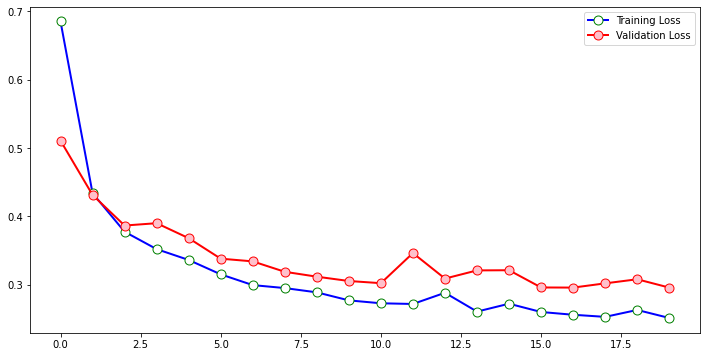

In [ ]:
train_loss,test_loss = history.history.get('loss'),history.history.get("val_loss")
plt.figure(figsize = (12,6))

plt.plot(train_loss,marker = 'o',c='b',mfc='w', mec='g'
         ,linewidth = 2,markersize=9,label="Training Loss")
plt.plot(test_loss,marker = 'o',c='r',mfc='pink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Loss")
plt.legend()
plt.show()

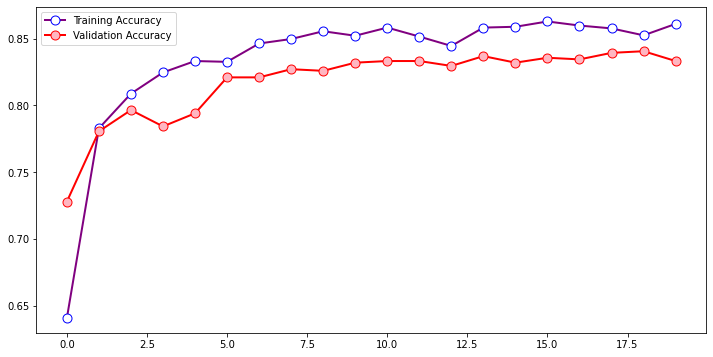

In [ ]:
plt.figure(figsize = (12,6))

train_acc,test_acc = history.history.get("binary_accuracy"),history.history.get("val_binary_accuracy")

plt.plot(train_acc,marker = 'o',c='purple',mfc='w', mec='b'
         ,linewidth = 2,markersize=9,label="Training Accuracy")
plt.plot(test_acc,marker = 'o',c='r',mfc='lightpink', mec='r'
         ,linewidth = 2,markersize=9,label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
loss_df['inception'] = history.history.get('loss')
acc_df['inception'] =  history.history.get('binary_accuracy')

In [ ]:
loss_df.to_csv("./drive/MyDrive/data/loss_df.csv")

In [ ]:
acc_df.to_csv("./drive/MyDrive/data/acc_df.csv")

### Comparison

In [ ]:
colors = {
    'custom_model':'r',
    'MobileNetV2':'m',
    'ResNet50V2':'b',
    'inception':'c'
}

In [ ]:
loss_df.columns

Index(['custom_model', 'MobileNetV2', 'ResNet50V2', 'inception'], dtype='object')

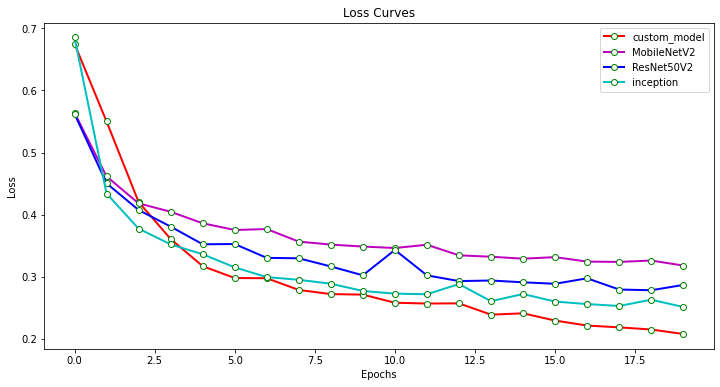

In [ ]:
train_loss,test_loss = history.history.get('loss'),history.history.get("val_loss")
plt.figure(figsize = (12,6))



for col in loss_df.columns:
  plt.plot(loss_df[col],marker = 'o',c=colors[col],mfc='w', mec='g'
         ,linewidth = 2,markersize=6,label=col)
  
plt.legend()
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

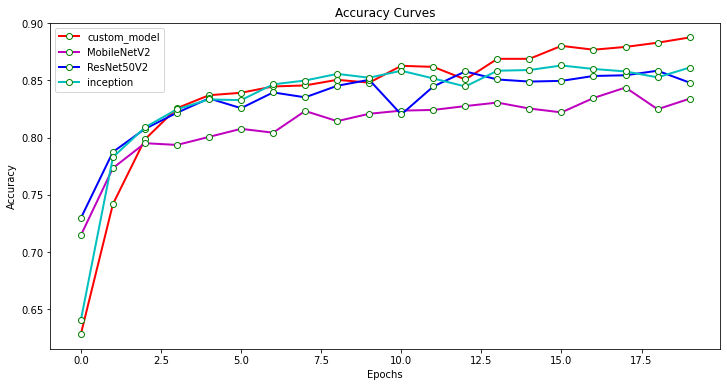

In [ ]:
plt.figure(figsize = (12,6))

for col in acc_df.columns:
  plt.plot(acc_df[col],marker = 'o',c=colors[col],mfc='w', mec='g'
         ,linewidth = 2,markersize=6,label=col)
  
plt.legend()
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Run From Here .... 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # code to load data
# !cp ./drive/MyDrive/data/data.zip -d ./
# !unzip data.zip
# !cp ./drive/MyDrive/data/best-model.h5 -d ./
# !cp ./drive/MyDrive/data/mobilenet_v3_potholes.h5 -d ./
!clear

In [ ]:
# build input pipeline using tf.data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    )
testing_set= train_datagen.flow_from_directory(
    "./data/",
    target_size = (128,128),
    batch_size=64,
    class_mode= 'binary',
    subset = 'validation'
)

FileNotFoundError: ignored

In [ ]:
next(iter(testing_set))[0].shape

In [ ]:
run_model = "normal" #"mobilenet"

In [ ]:
# model = tf.keras.models.load_model("model.h5")
if run_model == "normal":
  model = tf.keras.models.load_model("best-model.h5",compile = False)
elif run_model == "mobilenet":
  model = tf.keras.models.load_model("mobilenet_v3_potholes.h5")

In [ ]:
# Delete at end

single_img = next(iter(testing_set))[0][5]
single_img = tf.expand_dims(single_img,axis = 0)
new_model = tf.keras.models.Model(inputs = model.inputs, outputs = model.layers[7].output)

In [ ]:
## Delete in end
# Plotting Result
fig,axis = plt.subplots(2,2,figsize = (8,8))
k = 0
img_counter = 1
for i,axises in enumerate(axis):
  for j,ax in enumerate(axises):
    model_image = new_model.predict(single_img)


    if i == 0 and j == 0:
      ax.set_title("Original")
      ax.imshow(single_img[0])
    elif i == 0 and j == 1:
      ax.set_title("Channel Sum")
      model_image = tf.math.reduce_sum(model_image,axis = -1)
      ax.imshow(model_image[0,:,:],cmap = plt.cm.gray)
    else:
      indx_to_take = [20,31]
      random_index = np.random.randint(0,model_image.shape[-1])
      # print(random_index)
      # print(model_image.shape)
      ax.set_title("Random Channel : {}".format(indx_to_take[k]))
      ax.imshow(model_image[0,:,:,indx_to_take[k]],cmap = plt.cm.gray)
      k += 1

    ax.set_axis_off()

plt.show()

### Delete from here

In [ ]:
testing_set.classes

In [ ]:
data = next(iter(testing_set))
data_imgs = data[0]
data_labels = data[1]
print(data_imgs.shape,data_labels.shape)

In [ ]:
preds = tf.math.round(model.predict(data_imgs))

In [ ]:
preds = tf.reshape(preds,(64,))
print(preds.shape)

In [ ]:
preds = preds.numpy()
preds

In [ ]:
data_labels

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(data_labels,preds)

In [ ]:
print(classification_report(data_labels,preds))

In [ ]:
testing_set.class_indices

In [ ]:
preds = tf.math.round(model.predict(testing_set))
preds = tf.cast(preds,dtype = tf.int32)

# y_true = list(testing_set)

#intnp.round(prediction.ravel()[0])

### Till Here (Output)

In [ ]:
prediction_dict = {0:'normal', 1:'potholes'}

In [ ]:
def load_single_img(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img,channels=3)
  return img

In [ ]:
def predict(path):
  img = load_single_img(path)
  # img show
  plt.imshow(img)
  if run_model == "normal":
    img = tf.image.resize(img,(64,64))
  elif run_model == "mobilenet":
    img = tf.image.resize(img,(128,128))
  # img predict
  img = tf.expand_dims(img,axis = 0)
  prediction = model.predict(img)
  plt.title(prediction_dict[int(np.round(prediction.ravel()[0]))])
  plt.show()

In [ ]:
predict("./data/potholes/10.jpg")